# 3章 ニューラルネットワーク

## 3.2 活性化関数
### 3.2.2 Step関数の実装
Step関数
$$
h(x)=
\begin{cases}
0&\quad (x\leq 0)\\
1&\quad (x>0)
\end{cases}
$$


In [2]:
function step_function(x)
    if x<=0
        return 0
    else 1
    end
end

step_function (generic function with 1 method)

### 3.2.3 ステップ関数のグラフ

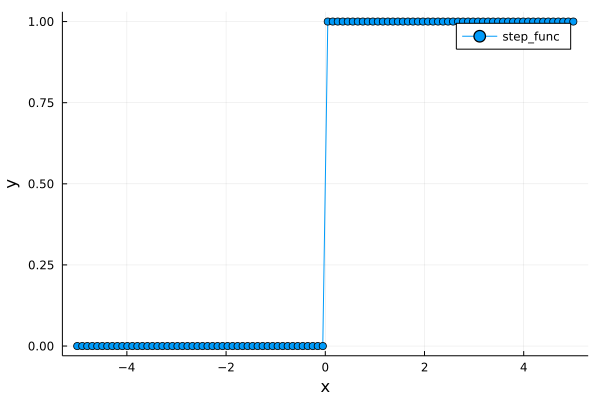

In [3]:
using Plots
x=range(-5,5,length=100)
y=step_function.(x)
step_plot=plot(x,y, xlabel="x",ylabel="y",markershape=:circle,label="step_func")

### 3.2.4 シグモイド関数の実装
シグモイド関数
$$
h(x)=\dfrac{1}{1+\exp(-x)}
$$

In [4]:
function sigmoid_function(x)
    return 1/(1+exp(-x))
end

sigmoid_function (generic function with 1 method)

In [5]:
sigmoid_function.([-1.0,1.0,2.0])

3-element Vector{Float64}:
 0.2689414213699951
 0.7310585786300049
 0.8807970779778823

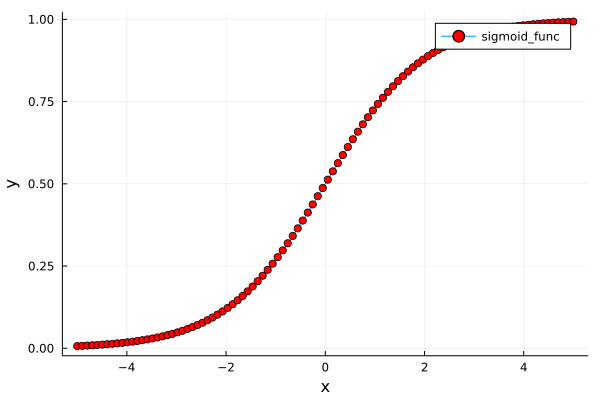

In [6]:
x=range(-5,5,length=100)
y=sigmoid_function.(x)
sigmoid_plot=plot(x,y, xlabel="x",ylabel="y",markershape=:circle,label="sigmoid_func",markercolor=:red)

### 3.2.5 シグモイド関数とステップ関数の比較

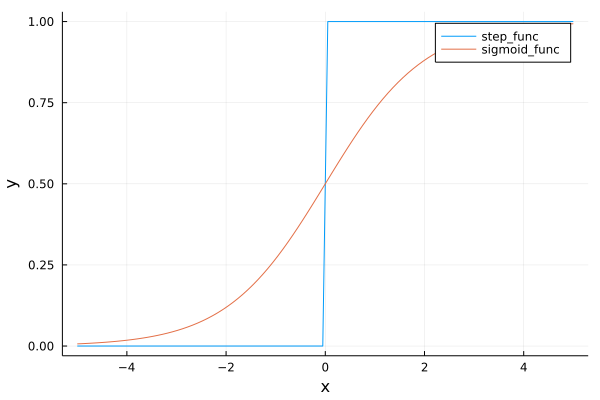

In [7]:
x=range(-5,5,length=100)
plot(x,step_function.(x), xlabel="x",ylabel="y",label="step_func")
plot!(x,sigmoid_function.(x), xlabel="x",ylabel="y",label="sigmoid_func")

### 3.2.7 ReLU関数
$$
h(x)=
\begin{cases}
x\quad (x>0)\\
0\quad (x\leq 0)
\end{cases}
$$

In [8]:
function relu(x)
    if x>0
        return  x
    else return 0
    end
end

relu (generic function with 1 method)

## 3.3 多次元配列の計算
### 3.3.3 ニューラルネットワークの内積

In [9]:
X=[1 2];
W=[1 3 5
2 4 6];
Y=X*W

1×3 Matrix{Int64}:
 5  11  17

### 3.4.2 各層における信号伝達の実装

![](images/2022-07-26-20-56-31.png)

In [10]:
## 第1層
X=[1.0 0.5];
W1=[0.1 0.3 0.5
0.2 0.4 0.6];
B1=[0.1 0.2 0.3];
A1=X*W1+B1;
Z1=sigmoid_function.(A1)

1×3 Matrix{Float64}:
 0.574443  0.668188  0.75026

In [11]:
## 第2層
W2=[0.1 0.4
0.2 0.5
0.3 0.6];
B2=[0.1 0.2];
A2=Z1*W2+B2;
Z2=sigmoid_function.(A2)

1×2 Matrix{Float64}:
 0.626249  0.771011

In [12]:
## 出力層
function identity_function(x)
    return x
end
W3=[0.1 0.3
0.2 0.4];
B3=[0.1 0.2];
A3=Z2*W3+B3;
Y=identity_function(A3)

1×2 Matrix{Float64}:
 0.316827  0.696279

### 恒等関数とソフトマックス関数
$$
y_k=\dfrac{\exp(a_k)}{\displaystyle\sum_{k}^{n}\exp(a_i)}
$$

In [30]:
function soft_max_function(x::Array{Float64,2})
    sum_exp=sum(x)
    exp_a=exp.(x)
    return exp_a/sum_exp
end

soft_max_function (generic function with 1 method)

In [31]:
soft_max_function([1.0 2.0 3.0])

1×3 Matrix{Float64}:
 0.453047  1.23151  3.34759

### 3.5.2 ソフトマックス関数の実装上の注意

In [49]:
function soft_max_function(x::Array{Float64,2})
    c=maximum(x)
    sum_exp=sum(exp.(x.-c))
    exp_a=exp.(x.-c)
    return exp_a/sum_exp
end

soft_max_function (generic function with 1 method)

In [50]:
a=[1010.0 1000.0 990.0]
soft_max_function(a)

1×3 Matrix{Float64}:
 0.999955  4.53979e-5  2.06106e-9